<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/colab_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to colab

This notebook illustrates how to install the PML code and various other libraries. More details in the [official documentation](https://colab.research.google.com/notebooks/intro.ipynb) and the [official introduction](https://colab.research.google.com/notebooks/basic_features_overview.ipynb).

If you are running certain tasks, you can   select 'GPU' from the 'Runtime' tab at the top of this page for speed.

In [8]:
IS_COLAB = ('google.colab' in str(get_ipython()))
print(IS_COLAB)


True


# How to import standard libraries

Colab comes with most of the packages we need pre-installed. 





In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import glob

To install new packages, use the following (see [this page](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb) for details):

```
!pip install foo
```

To avoid installing packages  every time you open a colab,
 you can use this trick:

https://stackoverflow.com/questions/55253498/how-do-i-install-a-library-permanently-in-colab

## Numpy

In [4]:
import numpy as np
np.set_printoptions(precision=3)

A = np.random.randn(2,3)
print(A)

[[ 0.511  1.006 -0.014]
 [ 0.908  1.823  0.454]]


## Pandas

In [1]:
import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Sklearn

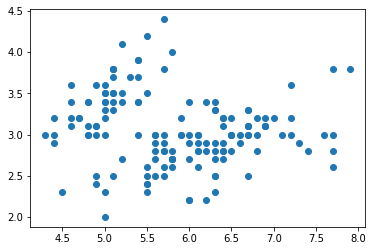

In [5]:
import sklearn

from sklearn.datasets import load_iris
iris = load_iris()
# Extract numpy arrays
X = iris.data 
y = iris.target

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

## JAX

In [11]:
# JAX (https://github.com/google/jax)

import jax
import jax.numpy as jnp
A = jnp.zeros((3,3))

# Check if JAX is using GPU
print("jax backend {}".format(jax.lib.xla_bridge.get_backend().platform))

jax backend gpu


## Tensorflow

In [9]:

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

print("tf version {}".format(tf.__version__))
print([d for d in tf.config.list_physical_devices()])

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

tf version 2.4.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## PyTorch

In [10]:

import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.7.0+cu101
Tesla T4


# Plotting

Colab lets you make static plots using matplotlib, as shown below.

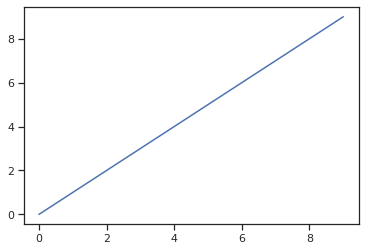

In [6]:
import matplotlib.pyplot as plt
import PIL
import imageio
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from IPython import display

# Check we can plot stuff
plt.figure()
plt.plot(range(10))

Colab also lets you create interactive plots using various javascript libraries - see [here](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N) for details.

In [12]:
import altair as alt
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

Below, the code lets you drag your mouse to select a region and interactively see the resulting histograms at the bottom.

In [13]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin',
    color='Origin',
    x='count(Origin)'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

# Installing code/ data from github

We show how to install the python code for this book from github into a local directory on this virtual machine. For more information, see [this article](https://towardsdatascience.com/google-drive-google-colab-github-dont-just-read-do-it-5554d5824228).

## Example: PyProbML site

In [3]:
# PyProbML files (data, scripts, etc)
!rm -rf pyprobml # Run this first if the pyprobml directory already exists
!git clone https://github.com/probml/pyprobml


Cloning into 'pyprobml'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 5449 (delta 6), reused 8 (delta 3), pack-reused 5427
Receiving objects: 100% (5449/5449), 196.92 MiB | 35.91 MiB/s, done.
Resolving deltas: 100% (3061/3061), done.


In [4]:
!ls

pyprobml  sample_data


Check we can access scripts and any functions they define

In [5]:


os.chdir('pyprobml/scripts')
import pyprobml_utils as pml
pml.pyprobml_test()


welcome to python probabilistic ML library


# Accessing local files

For more information about how to upload/download files with colab, see [this article](https://neptune.ai/blog/google-colab-dealing-with-files).

Running the cell below opens the file in the editor in the pane on the right. You can edit this file and then double click on its title to save it.

In [32]:
from google.colab import files
files.view('pyprobml_utils.py')

<IPython.core.display.Javascript object>

The result should look something like this:

<img src="https://github.com/probml/pyprobml/blob/master/book1/intro/colab-file-editor.png?raw=true">

If you make changes to a file, they will not be noticed unless you use the magic below.

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Suppose you edit the pyprobml_utls.py file so the print statement is changed. If we call this file again, we should see the new output, as illustrated bekow.

In [13]:
pml.pyprobml_test()

welcome to python probabilistic ML library!!


We can also read data.

In [14]:


!ls '../data'
datadir = '../data'
import re
fname = os.path.join(datadir, 'timemachine.txt')
with open(fname, 'r') as f:
    lines = f.readlines()
    sentences = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]
for  i in range(5):
  words = sentences[i]
  print(words)

20news_w100.mat		      faithful.txt	   prostate
bread.jpg		      goog.npy		   sachsCtsHTF.txt
CelebA			      heightWeight	   sat
chemical_shifts_theo_exp.csv  IceCreamMurder.xlsx  SP500.csv
clown.png		      knnClassify3c	   timemachine.txt
collegeAdmissions.csv	      moteData		   XwindowsDocData.mat
CRX_REF_R1_8mers.txt	      mpg.csv
['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'cares

# Syncing with Google drive

Files that you upload to colab are ephemeral, since colab is a temporary environment with an idle timeout of 90 minutes and an absolute timeout of 12 hours. To save any files permanently, you need to mount your google drive folder by running the cell below, and cutting and pasting the password that will be sent to you in a different tab.



In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
!pwd

/content/pyprobml/scripts


In [31]:
with open('/content/gdrive/MyDrive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/MyDrive/foo.txt

Hello Google Drive!

# Avoiding problems with global state

One of the main drawbacks of colab is that all variables are globally visible, so you may accidently write a function that depends on the current state of the notebook, but which is not passed in as an argument. Such a function may fail if used in a different context.

One solution to this is to put most of your code in files, and then have the notebook simply import the code and run it, like you would from the command line. Then you can always run the notebook from scratch, to ensure consistency.

Another solution is to use the [localscope](https://localscope.readthedocs.io/en/latest/README.html) package can catch some of these errors.




In [ ]:
!pip install localscope


  Created wheel for localscope: filename=localscope-0.1.3-cp36-none-any.whl size=4068 sha256=7a5d6718e16dbff82fe94e1229d233a19ef52280ff0d4fc48ef62a2ba41d5855
  Stored in directory: /root/.cache/pip/wheels/89/57/33/ce153d31de05d74323324df0f45a08ea99e92300e549da5154
Successfully built localscope


In [ ]:
from localscope import localscope

In [ ]:
a = 'hello world'
def myfun():
   print(a) # silently accesses global variable

myfun()

hello world


In [ ]:
a = 'hello world'
@localscope
def myfun():
  print(a)

myfun()

ValueError: ignored

In [ ]:
def myfun2():
  return 42

@localscope
def myfun3():
  return myfun2()

  

ValueError: ignored

In [ ]:
@localscope.mfc # allow for global methods, functions, classes
def myfun4():
  return myfun2()

myfun4()

42

# Software engineering tools

 [Joel Grus has argued](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit) that notebooks are bad for developing complex software. [Jeremy Howard has responded here](https://www.youtube.com/watch?v=9Q6sLbz37gk&feature=youtu.be).
See [nbdev](https://github.com/fastai/nbdev) from fastai for various tools that make notebooks more useful.